<a href="https://colab.research.google.com/github/Harshcs2002/Task-6-Prediction-using-Decision-Tree-Algorithm/blob/main/SparksTask6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 6 Prediction using Decision Tree Algorithm
Create decision tree classifier and visualize it graphically

## Author :- Harsh Jaiswal

#### importing libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#### loading the dataset

In [2]:
df=pd.read_csv('/content/Irisdata.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [19]:
df['Species_class']=np.where(df.Species=='Iris-virginica',1,np.where(df.Species=='Iris-versicolor',2,3))

In [20]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

#### Model Preparation

In [22]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
train_X, test_X, train_y, test_y = train_test_split( df[cols],df['Species_class'],test_size = 0.2,random_state = 123 )

#### Model Building

In [23]:
param_grid = {'max_depth': np.arange(2, 8), 'max_features': np.arange(2,5)}

In [26]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [27]:
tree.best_score_

0.9583333333333334

In [28]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=3)

In [29]:
tree.best_params_

{'max_depth': 2, 'max_features': 3}

In [31]:
test_pred = tree.predict(test_X)

In [32]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Building Final Decision Tree

In [33]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=2)

#### Model evaluation

In [34]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,'predicted': clf_tree.predict( test_X ) } )

In [35]:
tree_test_pred.sample( n = 10 )

,actual,predicted
117,1,1
13,3,3
59,2,2
88,2,2
46,3,3
141,1,1
37,3,3
8,3,3
42,3,3
138,1,1


In [36]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9666666666666667

Text(0.5, 23.52222222222222, 'Predicted label')

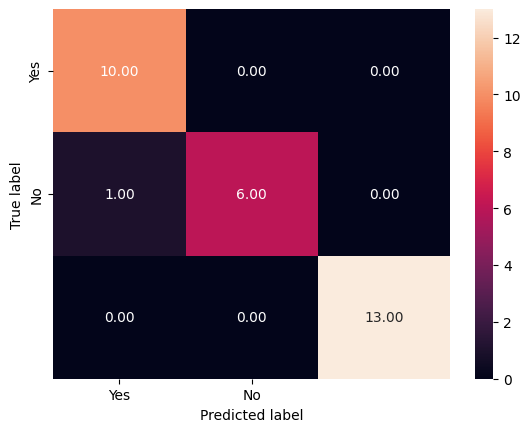

In [41]:
import seaborn as sns
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted, tree_test_pred.actual )
sns.heatmap(tree_cm, annot=True,fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Graphical Representation of Decision Tree

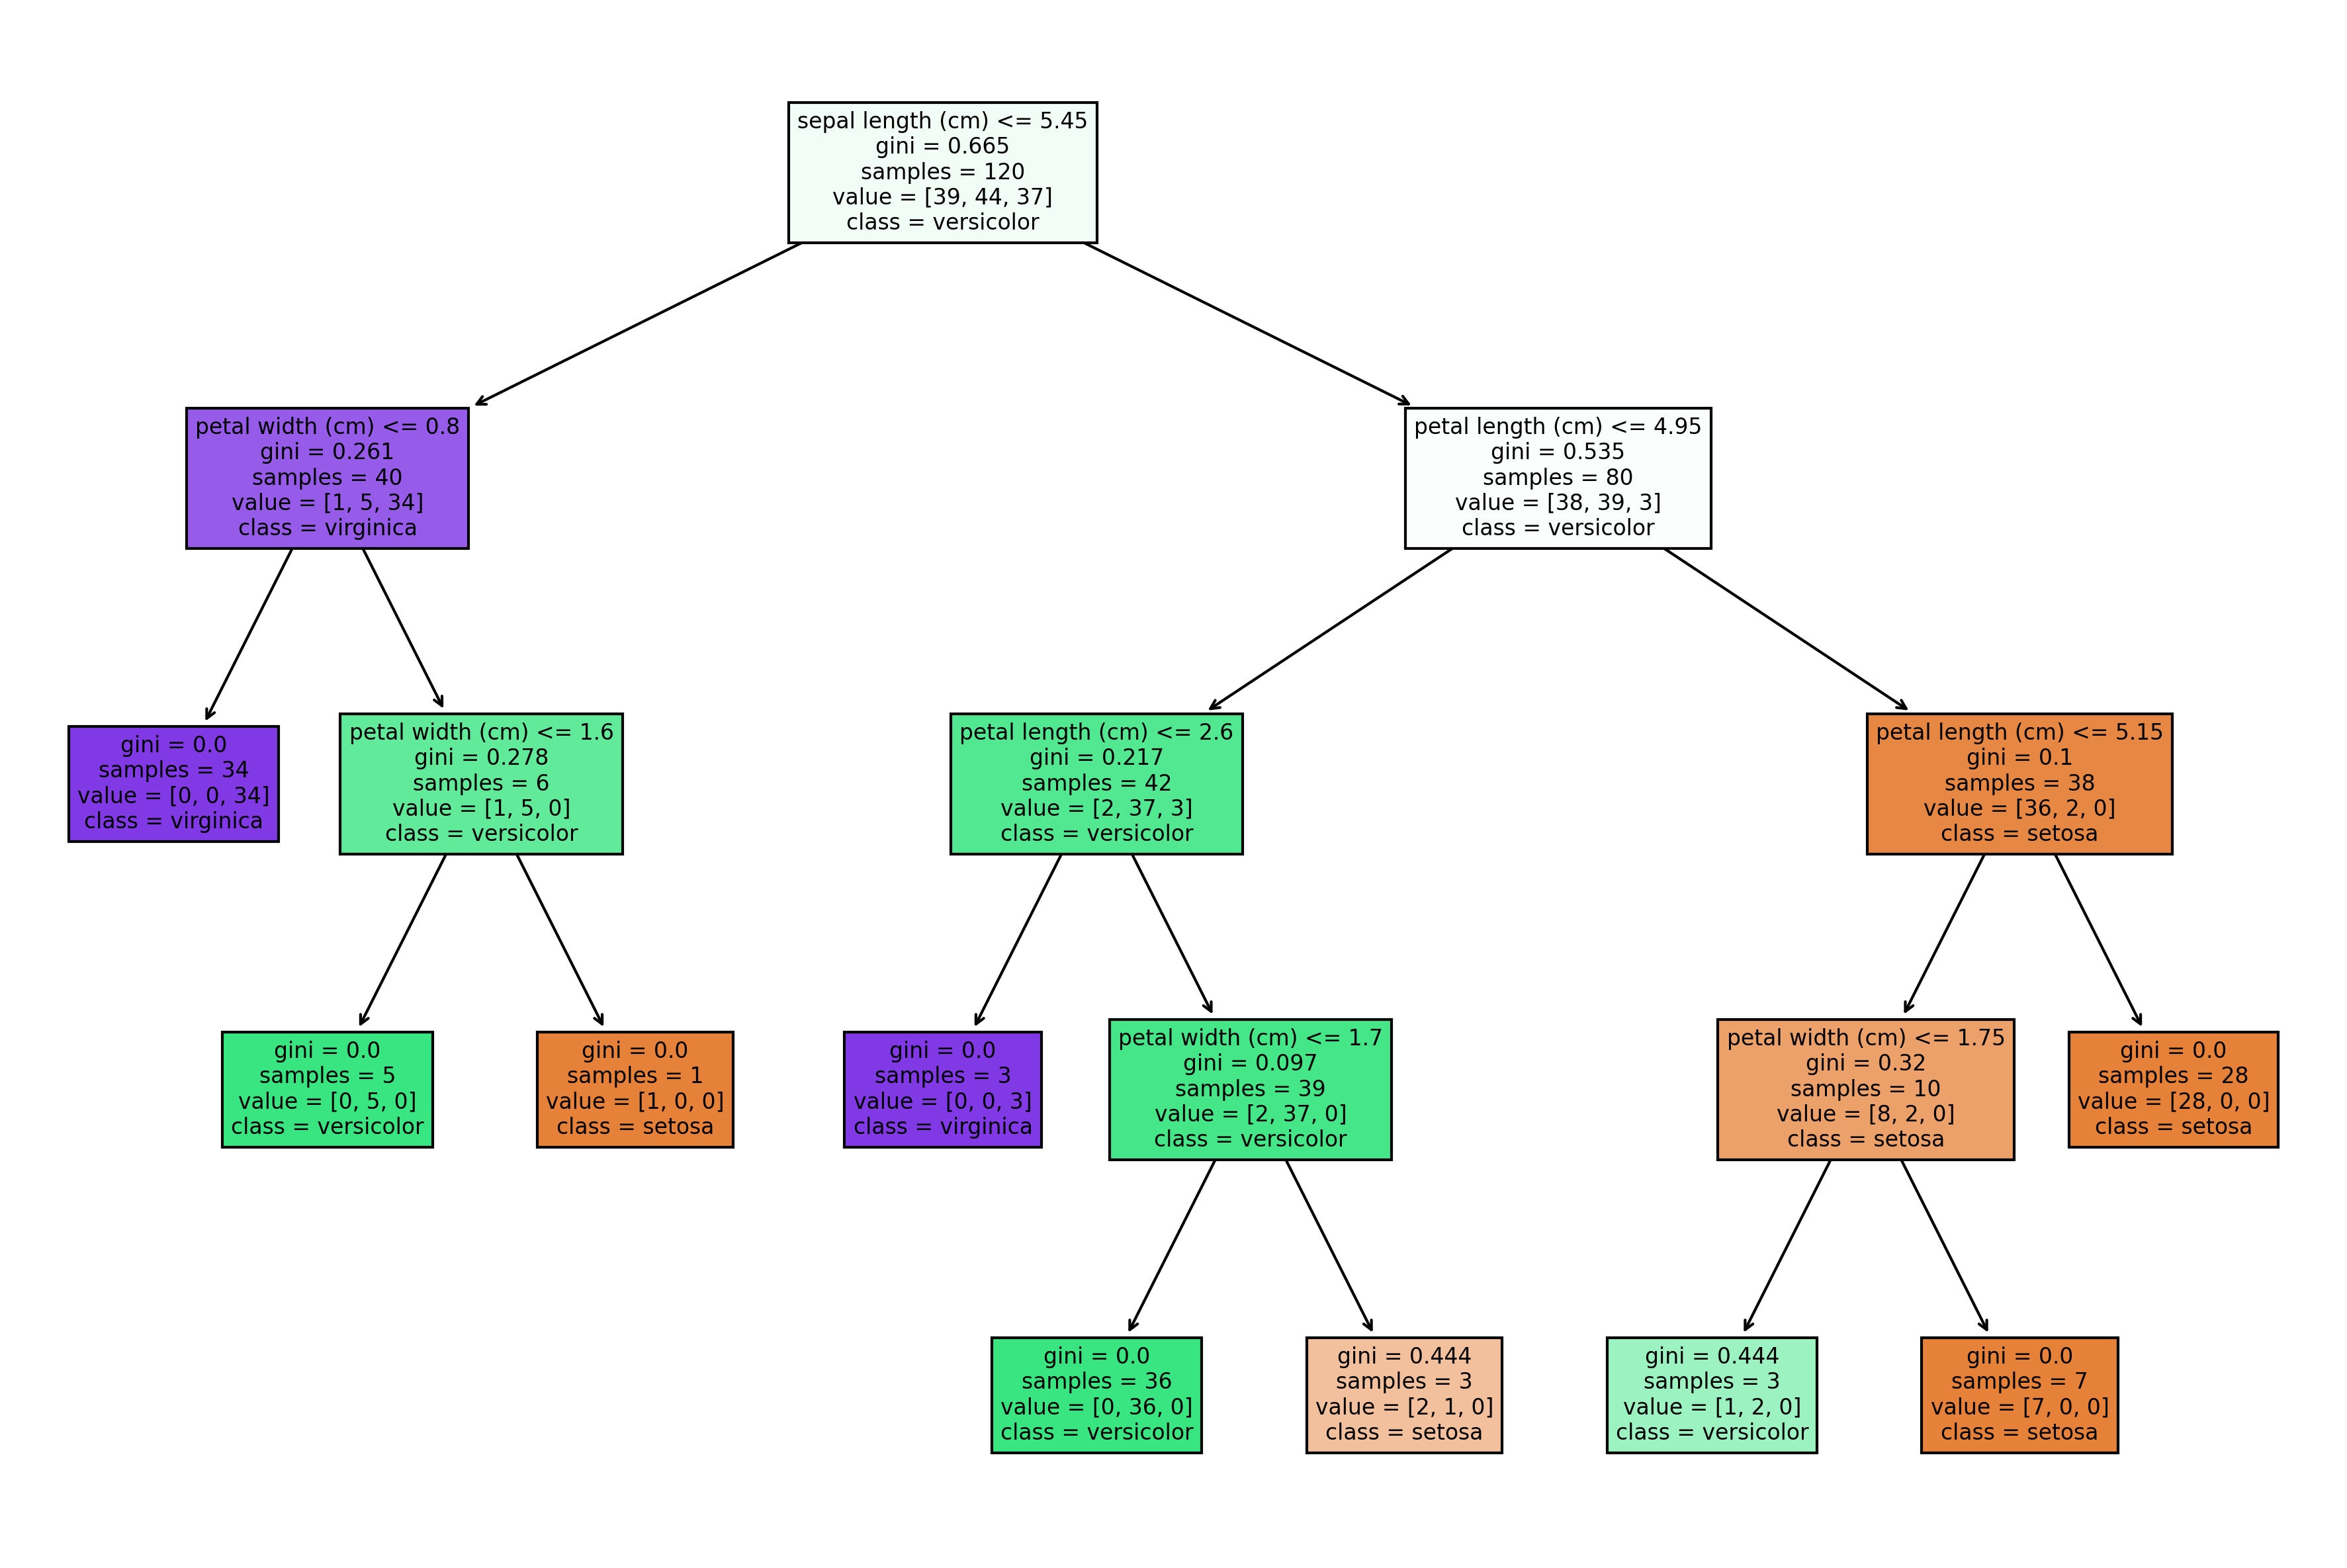

In [42]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree, feature_names = fn,  class_names=cn, filled = True);
fig.savefig('imagename.png')

# Thank You :)